In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from joblib import dump, load

In [2]:
claims_df = pd.read_csv('../data/processed/dim_claims_train.csv').fillna(0)
claims_df.loc[:, 'reject_code'] = claims_df['reject_code'].astype(int)
# only the rejected claims should be examined when determining reject code
claims_df = claims_df.loc[claims_df['pharmacy_claim_approved'] == 0]

claims_X = claims_df[['bin', 'drug']]
claims_y = claims_df['reject_code']

# Model Improvements
- General Cleaning of Code
    - Removed unnecessary type casting.
- Implement Pipeline for Model Preparation
    - Apply changes to the best model from the notebook `decision-tree-reject-code-01`.
- Implement and Test Model Persistence
    - Use joblib to implement model persistence.

## Train Original Model

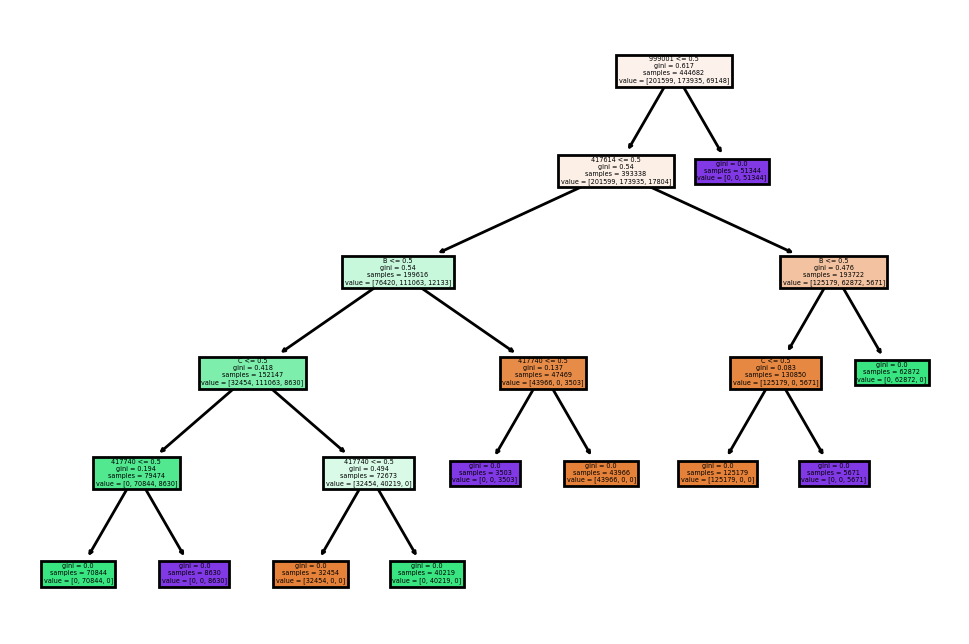

In [3]:
ohe = OneHotEncoder(sparse=False, drop='first')
claims_X_ohe = ohe.fit_transform(claims_X)

model = DecisionTreeClassifier(random_state=42)
model.fit(claims_X_ohe, claims_y)

f = plt.figure(dpi=200)
names = [x.split('_')[1] for x in ohe.get_feature_names()]
plot_tree(model, filled=True, feature_names=names)
plt.show()

## Pipeline Implementation
The tree diagram is the same as the original model.

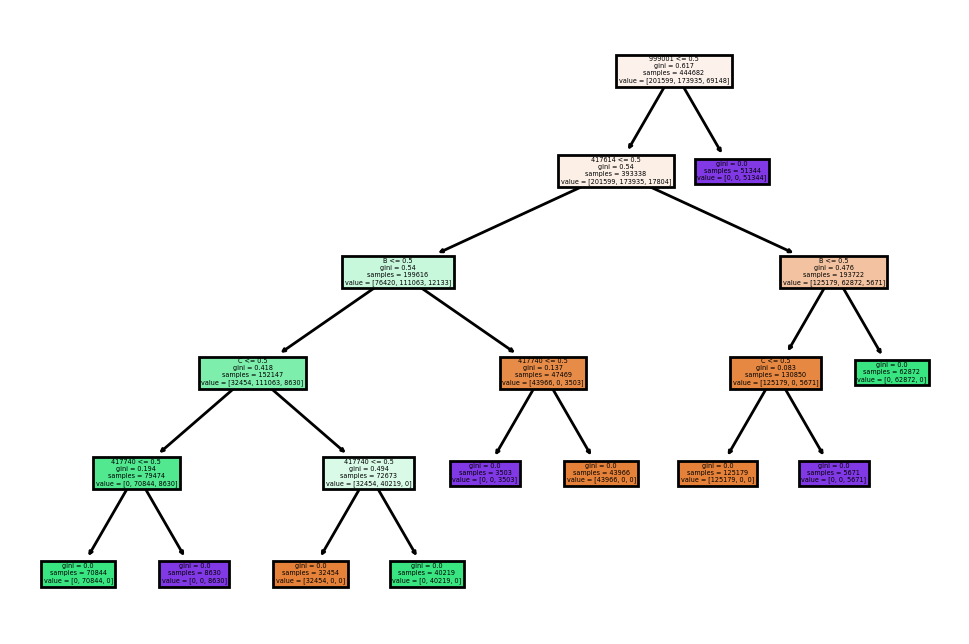

In [4]:
encoder = OneHotEncoder(sparse=False, drop='first')
model = DecisionTreeClassifier(random_state=42)
pipe = Pipeline([('encoder', encoder),
                 ('model', model)])

pipe.fit(claims_X, claims_y)

f, ax = plt.subplots(dpi=200)
names = [x.split('_')[1] for x in pipe['encoder'].get_feature_names()]
plot_tree(pipe['model'], filled=True, feature_names=names)
plt.show()

## Save Pipeline to File, Load, and Compare
The tree diagram is the same as the original model and pipeline model. Persistence has been confirmed.

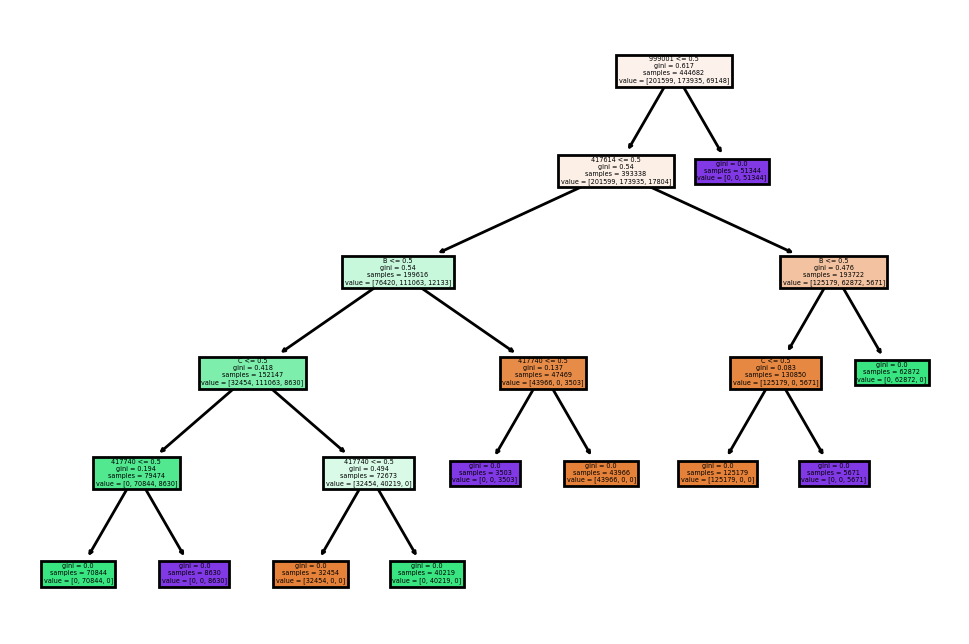

In [5]:
file_name = r"./saved-models/decision-tree-reject-code.joblib"
dump(pipe, file_name)
loaded_pipe = load(file_name)

f = plt.figure(dpi=200)
names = [x.split('_')[1] for x in loaded_pipe['encoder'].get_feature_names()]
plot_tree(loaded_pipe['model'], filled=True, feature_names=names)
plt.show()